# **Jupyter notebook (Caracterización de redes y topologías biológicas)**
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## **Práctica 2: Grafos Aleatorios, Regulares, de Mundo pequeño y libres de escala**

### 1. Estudiar las propiedeades de un grafo aleatorio.

**a. Usando la función gnp_random_graph(n,p) de NetworkX, implementad una rutina Python L_C_Aleatorio que devuelva el valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos aleatorios de n nodos y probabilidad p.** 

El formato de la función debe ser:

``[l,c] = L_C_Aleatorio(n_graph,n,p)``

In [43]:
# importación librerías
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pickle
import os.path
import numpy as np
import string

* Definir K exactamente y explicar por qué puede ser interesante coger dicho valor (su media). 
* Explicar los diferentes pasos y por qué cogemos n-1 cuando el grafo no es conexo. 

In [2]:
# Definición de la función
def L_C_Aleatorio(n_graph, n, P):
    C = []
    L = []
    K = []
    for graph in range(n_graph):
        G = nx.gnp_random_graph(n, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        Degree = dict(nx.degree(G)).values()
        K.append(sum(Degree)/len(Degree))
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), round(sum(K)/len(K), 3)

Cuanndo el grafo no es conexo coge como L n-1 porque es el valor máximo de camino característico. Podría poner Inf, pero sale mal gráficamente

parap intalas juntas se podría dividir por el máximo para hacer que estén en la misma escala. 

**b. Usando la rutina anterior, dibujar el comportamiento de L, C para distintos valores de la probabilidad p y un número fijo de nodos.** 

* Tomad n=400, n_graph=20 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

* Dibujad una gráfica que describa el comportamiento de estos dos parámetros como función de p, usad escala logarítmica en el eje x.

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

En primer lugar, llevamos a cabo la simulación de los grafos aleatorios para las probabilidades dadas. Dado que los tiempos de ejecución son extensos, se procede a guardar los resultados en ficheros binarios mediante el módulo ``pickle``. El protocolo a través del cual los objetos se han guardado es el establecido por defecto. **ESTO LO HE HECHO PARA QUE PODAMOS TRABAJAR NOSOTROS EN TIEMPOS RAZONABLES, SI PARA LA ENTREGA PREFIERES QUITARLO, NO PROBLEM.**.

In [3]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 
         0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_random_metrics.pkl"):
    with open("G_random_metrics.pkl", "rb") as file:
        G_random_metrics = pickle.load(file)
else:    
    C_results_1 = []
    L_results_1 = []
    K_results_1 = []
    for P in Probs:
        Indiv_results_1 = L_C_Aleatorio(20, 400, P)
        C_results_1.append(Indiv_results_1[1])
        L_results_1.append(Indiv_results_1[0])
        K_results_1.append(Indiv_results_1[2])

    G_random_metrics = [C_results_1, L_results_1, K_results_1]
    
    with open("G_random_metrics.pkl", "wb") as file:
        pickle.dump(G_random_metrics, file, -1)

Siguen la misma distribución con la diferencia de que L está normalizado (es un coeficiente) y K no.

In [107]:
print(*G_random_metrics[0])
print(*G_random_metrics[2])

0.0 0.0 0.0 0.0 0.0 0.002 0.004 0.01 0.03 0.06 0.1 0.3 0.601 1.0
0.0 0.042 0.127 0.235 0.383 1.207 2.415 4.004 11.957 23.96 39.72 119.671 239.664 399.0


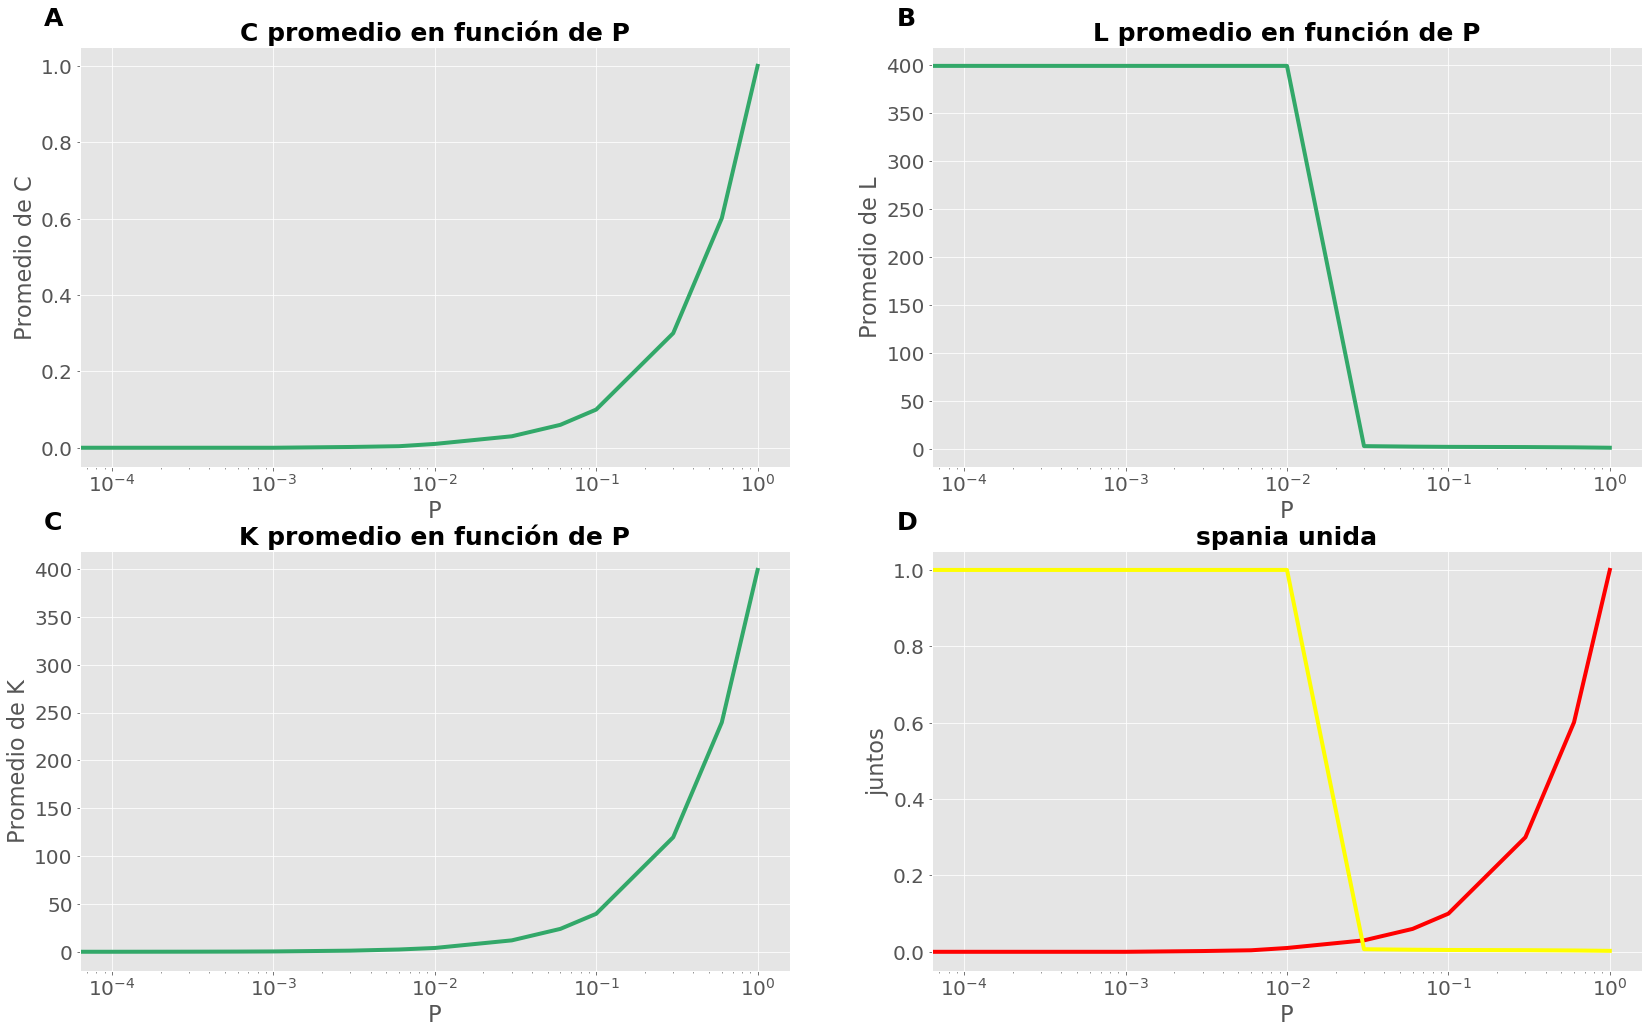

In [118]:
# Settings representación
G_titles_1 = ["C promedio en función de P", "L promedio en función de P",
                  "K promedio en función de P", "spania unida"]
G_ylabels = ["Promedio de C", "Promedio de L", "Promedio de K", "juntos"]
textSize = 25
lineW = 4

# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_random_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_random_metrics[0], linewidth = lineW, color = "red")
        ax.plot(Probs, np.array(G_random_metrics[1])/max(G_random_metrics[1]),
                linewidth = lineW, color = "yellow")
    ax.set_title(G_titles_1[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)

Como se puede observar en la primera gráfica, el comportamiento de C cambia para $P = 0.1$ $(10^{-1})$. Como se puede observar en la segunda gráfica, el comportamiento de L cambia para $P = 0.01$ $(10^{-2})$.

### 2. Redes regulares y de mundo pequeño

**a. Usando la función de NetworkX watts_strogatz_graph(n, k, p) implementad una rutina Python L_C_small_world(n_graph, n, k, p) que devuelva valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) para un conjunto de n_graph grafos de tipo Small World.** El formato de la función debe ser:

`` [l,c] = L_C_Small_World(n_graph,n,k,p)``

Nota: En el caso de que el grafo no sea conexo, usad el valor n-1 para L en ese grafo.


In [5]:
def L_C_Small_World(n_graph, n, k, P):
    C = []
    L = []
    K = []
    for graph in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        Degree = dict(nx.degree(G)).values()
        K.append(sum(Degree)/len(Degree))
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), round(sum(K)/len(K), 3)

**b. Usando la rutina anterior, generar una gráfica con el comportamiento de C y L para distintos valores de la probabilidad p y un número fijo de nodos y ramas.** 

* Tomad N=400, k=8 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.].

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C? ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k. ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

* Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.

* Con los datos que obtuviste en la práctica 1. ¿Dirías que la red de interacción de proteínas del _Caernobidis elegans_ puede ser considerada una red de mundo pequeño? Razona la respuesta.

In [6]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003,
         0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_SW_metrics.pkl"):
    with open("G_SW_metrics.pkl", "rb") as file:
        G_SW_metrics = pickle.load(file)
else:    
    C_results_2 = []
    L_results_2 = []
    K_results_2 = []
    for P in Probs:
        Indiv_results_2 = L_C_Small_World(20, 400, 8, P)
        C_results_2.append(Indiv_results_2[1])
        L_results_2.append(Indiv_results_2[0])
        K_results_2.append(Indiv_results_2[2])
    
    G_SW_metrics = [C_results_2, L_results_2, K_results_2]
    
    with open("G_SW_metrics.pkl", "wb") as file:
        pickle.dump(G_SW_metrics, file, -1)

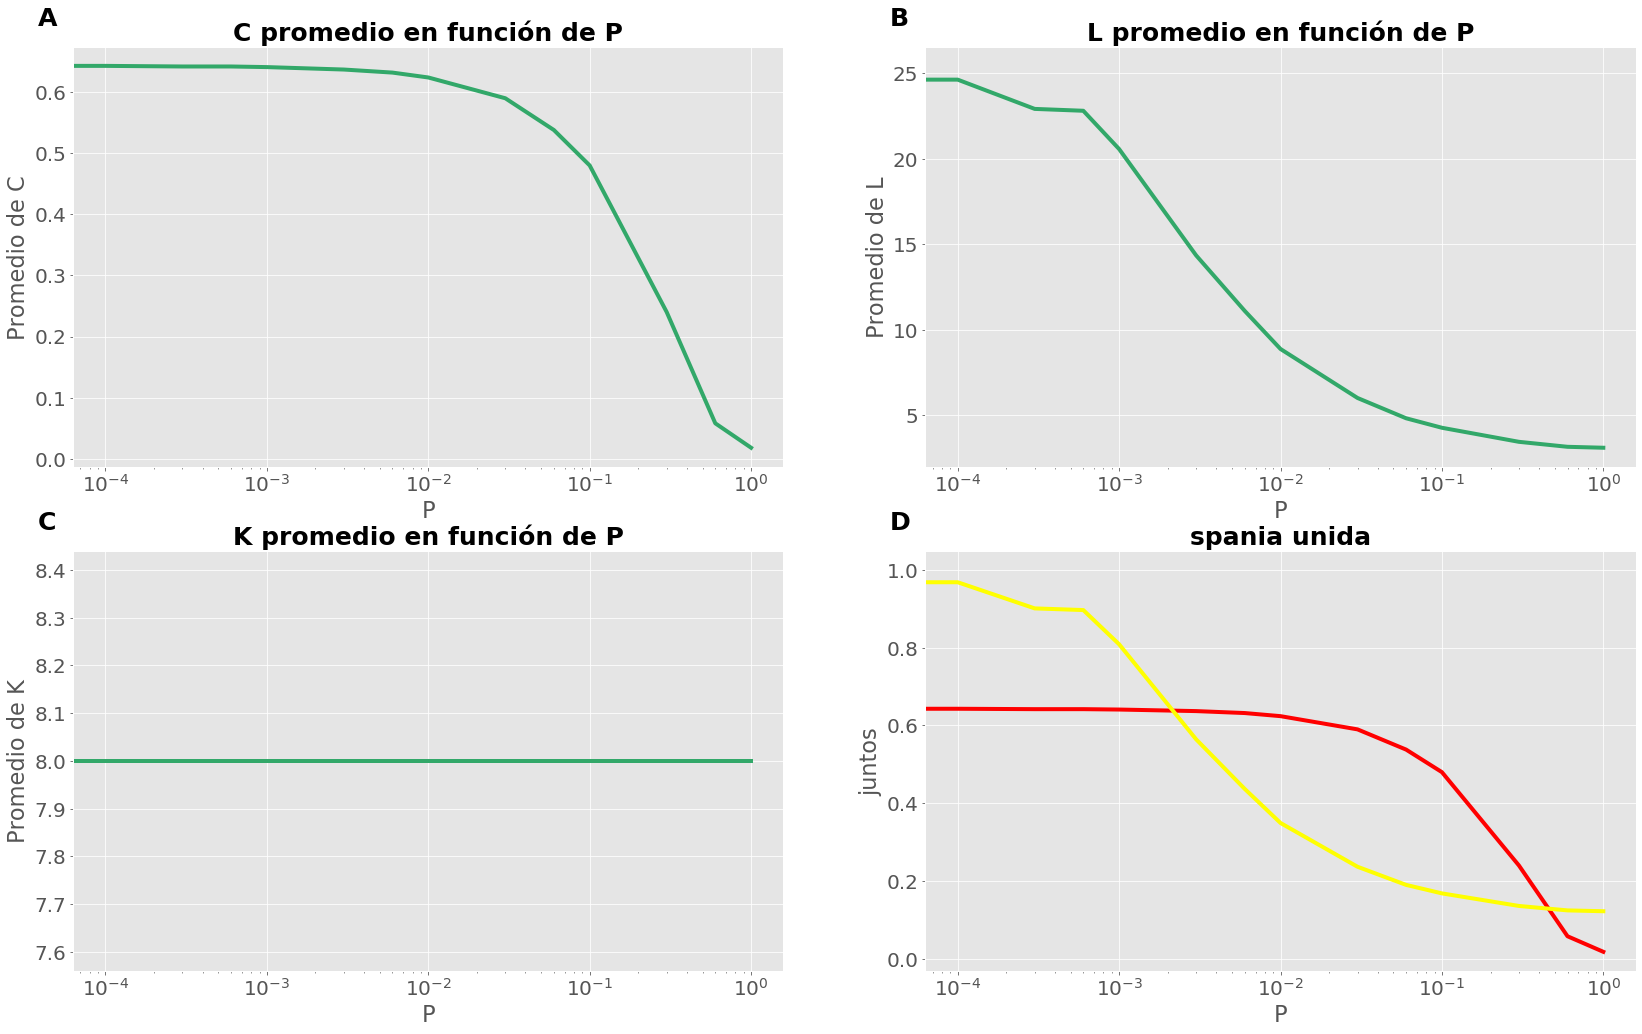

In [120]:
# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_SW_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_SW_metrics[0], linewidth = lineW, color = "red")
        ax.plot(Probs, np.array(G_SW_metrics[1])/max(G_SW_metrics[1]),
                linewidth = lineW, color = "yellow")

    ax.set_title(G_titles_1[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)

Explicación

### 3. Redes libres de Escala

**a. Generar una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)).** 

* Calculad los valores de L, C y la distribución de grado de los nodos. 

* Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [23]:
if os.path.isfile("G_SF_metrics.pkl"):
    with open("G_SF_metrics.pkl", "rb") as file:
        G_SF_metrics = pickle.load(file)
else:
    G_SF = nx.barabasi_albert_graph(10000, 10)
    C_SF = nx.average_clustering(G_SF)
    L_SF = nx.average_shortest_path_length(G_SF)
    m_SF = nx.number_of_edges(G_SF)
    Degree_dist_SF = nx.degree_histogram(G_SF)
    
    G_SF_metrics = [C_SF, L_SF, m_SF, Degree_dist_SF]
    
    with open("G_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_SF_metrics, file, -1)
    
print(G_SF_metrics[0], G_SF_metrics[1])

0.010585222161397909 3.0729635163516353


* **Explicar que el método de funcionamiento de la función ``nx.barabasi_albert_graph`` funciona bien.**
* **Hay que tener en cuenta que los límites que he metido en los gráficos van bien para estos grafos, pero como se generan aleatoriamente, puede que con otros no. Probablemente con casi todos funcionen y, en cualquier caso, se pueden generar de nuevo estableciendo una seed o algo así.**
* **En el primer gráfico debería aparecer la barra correspondiente al primer grado nodos en 1600 aprox (mirar siguiente gráfico), pero no aparece, no entiendo por qué.**

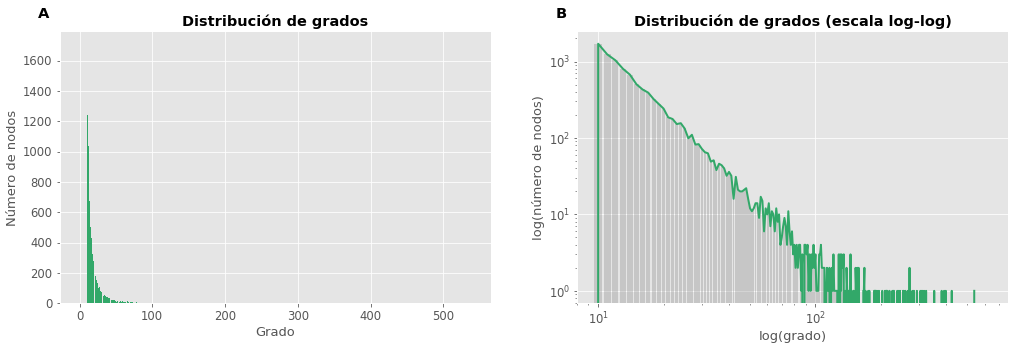

In [94]:
G_titles_2 = ["Distribución de grados", "Distribución de grados (escala log-log)"]
G_ylabels = ["Número de nodos", "log(número de nodos)"]
G_xlabels = ["Grado", "log(grado)"]

# Representación 
fig, axs = plt.subplots(1, 2, figsize = (17, 5))

for nax, ax in enumerate(axs.flat):
    if nax == 0:
        ax.bar(range(len(G_SF_metrics[3])), G_SF_metrics[3], color = "#32a869")
#         ax.set_ylim(0, 1300)
    else:
        ax.bar(range(len(G_SF_metrics[3])), G_SF_metrics[3], color = "grey", alpha = 0.3)
        ax.plot(range(len(G_SF_metrics[3])), G_SF_metrics[3], linewidth = 2, color = "#32a869")
        ax.set_xscale("log", nonposx='clip')
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(8)
        
    ax.set_title(G_titles_2[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel(G_xlabels[nax], fontsize = textSize * 0.9)    
    ax.tick_params(labelsize = textSize * 0.8)

Con el fin de ver la distribución sin escalar logarítmicamente más en detalle, los siguientes dos gráficos se corresponden con los grados 8-100 (A) y los grados 100-550 (B). Podemos observar que cómo claramente la red generada mediante la función ``nx.barabasi_albert_graph`` sigue la distribución típica de una red libre de escala con un gran número de nodos con bajo grado (A) y muy pocos nodos con una conectividad muy alta (B).

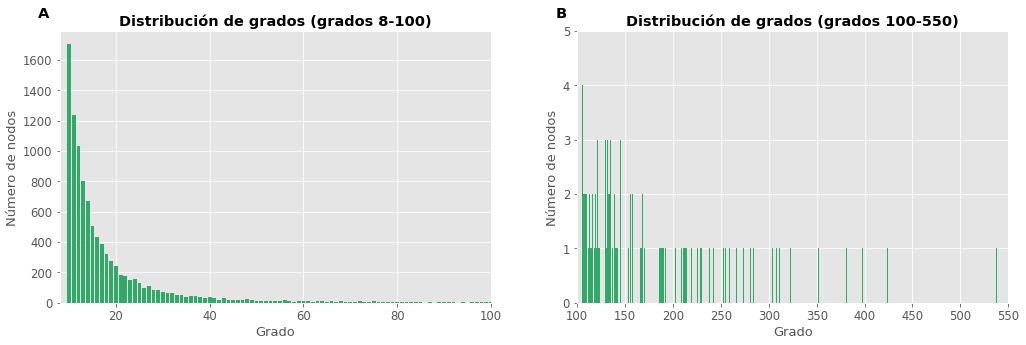

In [96]:
G_titles_3 = ["Distribución de grados (grados 8-100)",
              "Distribución de grados (grados 100-550)"]

fig, axs = plt.subplots(1, 2, figsize = (17, 5))

for nax, ax in enumerate(axs.flat):
    if nax == 0:
        ax.bar(range(len(G_SF_metrics[3])), G_SF_metrics[3], color = "#32a869")
        ax.set_xlim(8, 100)
    else:
        ax.bar(range(len(G_SF_metrics[3])), G_SF_metrics[3], color = "#32a869")
        ax.set_xlim(100, 550)
        ax.set_ylim(0, 5)
        
    ax.set_title(G_titles_3[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel(G_ylabels[0], fontsize = textSize * 0.9)
    ax.set_xlabel(G_xlabels[0], fontsize = textSize * 0.9)    
    ax.tick_params(labelsize = textSize * 0.8)

In [91]:
if os.path.isfile("G_random_SF_metrics.pkl"):
    with open("G_random_SF_metrics.pkl", "rb") as file:
        G_random_SF_metrics = pickle.load(file)
else:
    G_AL = nx.gnm_random_graph(10000, G_SF_metrics[2])
    C_AL = nx.average_clustering(G_AL)
    L_AL = nx.average_shortest_path_length(G_AL)
    Degree_dist_AL = nx.degree_histogram(G_AL)
    
    G_random_SF_metrics = [C_AL, L_AL, Degree_dist_AL]
    
    with open("G_random_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_random_SF_metrics, file, -1)
    
print(G_random_SF_metrics[0], G_random_SF_metrics[1])

0.0018992100687198932 3.4032812681268125


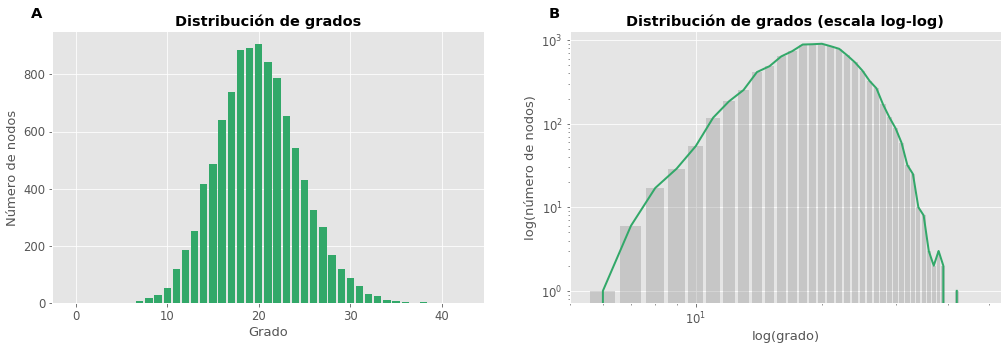

In [90]:
# Representación 
fig, axs = plt.subplots(1, 2, figsize = (17, 5))

for nax, ax in enumerate(axs.flat):
    if nax == 0:
        ax.bar(range(len(G_random_SF_metrics[2])), G_random_SF_metrics[2], color = "#32a869")
    else:
        ax.bar(range(len(G_random_SF_metrics[2])), G_random_SF_metrics[2], color = "grey", alpha = 0.3)
        ax.plot(range(len(G_random_SF_metrics[2])), G_random_SF_metrics[2], linewidth = 2, color = "#32a869")
        ax.set_xscale("log", nonposx='clip')
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(5)
        
    ax.set_title(G_titles_2[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel(G_xlabels[nax], fontsize = textSize * 0.9)    
    ax.tick_params(labelsize = textSize * 0.8)

Explicación